# Part III

# Black-Scholes: hedging simulations (30 pts.)

Question 1

# Question 3

1. Use the Euler method to perform a hedging simulation. Do an experiment where the volatility in the stock price process is matching the volatility used in the delta computation (set both equal to 20%).

2. Vary the frequency of the hedge adjustment (from daily to weekly) and explain the results. 

3. Perform numerical experiments where the volatility in the stock price process is not matching the volatility used in the delta valuation. Experiment for various levels and explain the results.


dynamic hedging strategy in order to ensure that the claim is replicated at expiry 

means what?

We start with ∆, which represents the amount of shares that need to be bought at t = 0 by
the agent in order to set up a hedge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Simulate the geometric brownian motion using the Euler method

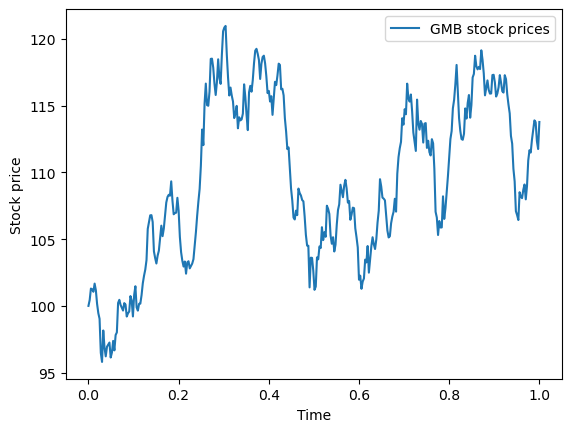

In [18]:
def gbm_using_euler(T, K, r, S0, sigma_stock, sigma_delta, M):
    """
    This function simulates geometric brownian motion using the Euler method and the
    algorithm provided in the appendix C.2.2

    The function returns:
        S = which is the simulated stock prices
        time = which is the timesteps for which we calculate the stock prices
    """

    dt = T / M
    S = np.zeros(M + 1)
    S[0] = S0
    time = np.zeros(M + 1)

    # Go through each time step m and find the current stock price S[m]
    for m in range(1, M + 1):
        Zm = np.random.normal(0, 1) # Sample a random number from a standard normal distribution
        S[m] = S[m - 1] + r * S[m - 1] * dt + sigma_stock * S[m - 1] * np.sqrt(dt) * Zm
        time[m] = m*dt

    return S, time

# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
sigma_delta = 0.2   # The volatility used in the delta computation = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)

# Simulate GBM using Euler method
simulated_stock_prices, time = gbm_using_euler(T, K, r, S0, sigma_stock, sigma_delta, M)

# Plot the GBM evolution of stockprices over time
plt.plot(time, simulated_stock_prices, label="GMB stock prices")
plt.xlabel("Time")    
plt.ylabel("Stock price")
plt.legend()
plt.show()


Finding the risk-neutral price of a european call option

In [4]:

def black_scholes_call_price(S, K, r, sigma, T):
    """
    This function calculates the risk-neutral price of a european call option, 
    using Black-Scholes.
    """

    # We want a dynamic hedging strategy??? so need to find a call_price for each timestep?
    # also here, sigma is the stock volatilty right? not yet the delta sigma?
    # does it matter that we consider SHORT position in a European CALL option?

    d1 = (np.log(S / K) + (r + (sigma**2)/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = stats.norm.cdf(d1) # Calculates the cumulative distribution function at d1 of N(0,1)
    N_d2 = stats.norm.cdf(d2)
    call_price = S * N_d1 - K * np.exp(-r * T) * N_d2

    return call_price



Hedging simulation

In [14]:
def hedge_simulation(S0, K, r, sigma, T, M, delta_frequency):
    """
    This function performs a hedging simulation. We want to find how hedging impacts our returns.
    We use the Euler method (the algorithm provided in the appendix C.2.2) to simulate geometric brownian motion.

    The function returns:
        S = which is the simulated stock prices
        time = which is the timesteps for which we calculate the stock prices
        the average profit or loss
    """
    
    dt = T / M
    S = np.zeros(M + 1)
    S[0] = S0
    call_prices = np.zeros(M + 1)
    time = np.zeros(M + 1)

    hedge_positions = np.zeros(M + 1)
    profits_losses = np.zeros(M + 1)
    
    # Calculate initial call option price
    call_prices[0] = black_scholes_call_price(S0, K, r, sigma, T)
    
    
    for m in range(1, M + 1):
        # Go through each time step m and find the current stock price S[m]
        Zm = np.random.normal(0, 1)
        S[m] = S[m - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Zm)
        time[m] = m*dt # Store the corresponding price
        
        # Update call option price
        call_prices[m] = black_scholes_call_price(S[m], K, r, sigma, T - m * dt)
        
        # Hedge the position at a frequency delta_frequency
        if m % delta_frequency == 0:
            delta = stats.norm.cdf((np.log(S[m] / K) + (r + 0.5 * sigma**2) * (T - m * dt)) / (sigma * np.sqrt(T - m * dt)))
            hedge_positions[m] = delta
        else:
            hedge_positions[m] = 0
        
        # Calculate the profit or loss at each time step
        profits_losses[m] = S[m] - delta * S[m] + call_prices[m] - call_prices[0] * np.exp(r * m * dt)
    
    return np.mean(profits_losses), time, S


# Setting the parameters
S0 = 100  # Initial stock price
K = 99    # Strike price of the option
r = 0.06  # Risk-free interest rate
sigma_stock = 0.20  # Volatility of the stock
T = 1     # Time to maturity
M = 365   # Number of time steps (assuming daily steps for one year)
delta_frequency = 7  # Frequency of delta adjustment (1 corresponds to daily and 7 to weekly)

# Perform hedging simulation
average_profit_loss, time, S = hedge_simulation(S0, K, r, sigma_stock, T, M, delta_frequency)

# Print average profit/loss
print("Average profit/loss:", average_profit_loss)



# Plot the GBM evolution of stockprices over time
plt.plot(time, simulated_stock_prices, label="GMB stock prices")
plt.xlabel("Time")    
plt.ylabel("Stock price")
plt.legend()
plt.show()


UnboundLocalError: cannot access local variable 'delta' where it is not associated with a value